# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import os

# Importing Dataset

In [7]:
path=r'/Users/urvi/Desktop/ACHIVEMENT 6/02 Data /Original Data'
path

'/Users/urvi/Desktop/ACHIVEMENT 6/02 Data /Original Data'

In [10]:
df_insurance= pd.read_csv(os.path.join(path,'insurance.csv'))

In [13]:
# Display the first few rows of the dataframe to understand its structure and contents
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Data cleaning

In [15]:
#Check for Duplicate values
duplicate_rows = df_insurance.duplicated().sum()

In [16]:
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 1


In [20]:
#Dropping duplicate value
df_insurance.drop_duplicates(inplace=True)

In [21]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


The dataset now consists of 1337 entries, indicating that the duplicate row has been successfully removed.With duplicates removed, each data point in the dataset represents a unique insurance record, making subsequent analyses more reliable.

In [23]:
#Finding missing values
missing_values = df_insurance.isnull().sum()
print(missing_values)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


No missing values were found in any of the columns.The absence of missing values suggests that the dataset is complete, which simplifies the preparation process for analysis, as no imputation or removal of missing data is necessary.

In [25]:
#Verifying Data types
print(df_insurance.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


Data types are appropriate for each column, with numerical columns (age, bmi, children, charges) correctly typed for mathematical operations and categorical columns (sex, smoker, region) as objects, suitable for categorization.

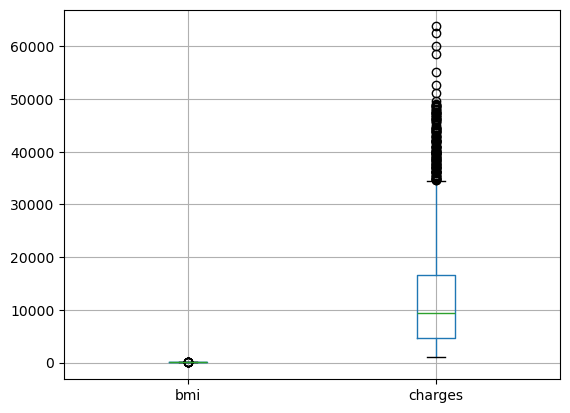

In [26]:
# Checking for outliers
import matplotlib.pyplot as plt
df_insurance[['bmi', 'charges']].boxplot()
plt.show()

The bmi box plot displayed a few extreme values, but these were not numerous enough to cause concern.
The charges box plot showed a significant number of high-value outliers, indicating substantial variance in insurance charges among the population. This variation could be key to understanding factors affecting healthcare costs.

In [27]:
#Normalizing the text 
df_insurance['sex'] = df_insurance['sex'].str.lower()
df_insurance['smoker'] = df_insurance['smoker'].str.lower()
df_insurance['region'] = df_insurance['region'].str.lower()

Text data in categorical columns (sex, smoker, region) was normalized to lowercase to maintain consistency and avoid any misclassification due to text case differences.

# Descriptive statistics

In [28]:
# Getting a descriptive statistical summary of the numerical variables
numerical_summary = df_insurance.describe()

In [29]:
# Reviewing the categorical variables
categorical_summary = df_insurance.describe(include=['object'])

In [30]:
# Displaying the statistical summaries
numerical_summary, categorical_summary

(               age          bmi     children       charges
 count  1337.000000  1337.000000  1337.000000   1337.000000
 mean     39.222139    30.663452     1.095737  13279.121487
 std      14.044333     6.100468     1.205571  12110.359656
 min      18.000000    15.960000     0.000000   1121.873900
 25%      27.000000    26.290000     0.000000   4746.344000
 50%      39.000000    30.400000     1.000000   9386.161300
 75%      51.000000    34.700000     2.000000  16657.717450
 max      64.000000    53.130000     5.000000  63770.428010,
          sex smoker     region
 count   1337   1337       1337
 unique     2      2          4
 top     male     no  southeast
 freq     675   1063        364)

# Exporting cleaned data set

In [35]:
df_insurance.to_csv(os.path.join(path,'insurance_cleaned.csv'))